# 🎓 Abstracto

En esta investigacion se analiza como diverso factores influyen en el rendimiento academico de los estudiantes. Utilizando el dataset StudentPerformanceFactors.csv de Kaggle, se analiza facores como la calidad del profesor, las horas de estudio semanales, la asistencia a clases y otros aspectos que provee el dataset. Las columnas del dataset son: 

| Columnas | Descripcion |
|:---|:---|
| Hours_Studied | Number of hours spent studying per week. |
| Attendance | Percentage of classes attended. |
| Parental_Involvement | Level of parental involvement in the student's education (Low, Medium, High). |
| Access_to_Resources | Availability of educational resources (Low, Medium, High). |
| Extracurricular_Activities | Participation in extracurricular activities (Yes, No). |
| Sleep_Hours | Average number of hours of sleep per night. |
| Previous_Scores | Scores from previous exams. |
| Motivation_Level | Student's level of motivation (Low, Medium, High). |
| Internet_Access | Availability of internet access (Yes, No). |
| Tutoring_Sessions | Number of tutoring sessions attended per month. |
| Family_Income	| Family income level (Low, Medium, High). |
| Teacher_Quality | Quality of the teachers (Low, Medium, High). |
| School_Type | Type of school attended (Public, Private). |
| Peer_Influence | Influence of peers on academic performance (Positive, Neutral, Negative). |
| Physical_Activity | Average number of hours of physical activity per week. |
| Learning_Disabilities | Presence of learning disabilities (Yes, No). |
| Parental_Education_Level | Highest education level of parents (High School, College, Postgraduate). |
| Distance_from_Home | Distance from home to school (Near, Moderate, Far). |
| Gender | Gender of the student (Male, Female). |
| Exam_Score | Final exam score. |


# 🧾 Contexto analitico



El rendimiento academico de los estudiantes es un tema de interes tanto para profesores como para alumnos. Comprender que factores influyen en la nota final de un examen es fundamental para poder obtener el exito academico.

# 🎯 Objetivo

El objetivo de esta investigacion es entender que factores afectan a la nota final de los estudiantes con el fin de poder predecir que nota final tendran otros estudiante segun los factores analizados.

# 📥 Importacion de datos

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
df = pd.read_csv("StudentPerformanceFactors.csv")
print(df.shape)
df.head()

(7928, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,9,87.0,High,Medium,No,6,82,Medium,Yes,0,Low,MEDIUM,Public,Negative,3,No,College,Near,Female,65
1,22,69.0,Low,Medium,No,9,84,Medium,Yes,0,Medium,Medium,Public,Neutral,3,No,College,Moderate,Male,64
2,19,87.0,High,High,No,10,60,High,Yes,2,Medium,Low,Private,Positive,3,No,High School,Moderate,Male,69
3,21,99.0,High,Low,Yes,4,67,Medium,Yes,1,Medium,Medium,Private,Negative,4,No,College,Near,Female,71
4,12,NaN,Medium,High,Yes,8,78,Low,Yes,2,Medium,Medium,Public,Negative,2,No,Postgraduate,Near,Female,64


# 🧹Limpieza de datos

Corroboro si hay duplicados. En caso de que existan los elimino

In [274]:
df.duplicated().sum()

np.int64(1321)

In [275]:
df = df.drop_duplicates()

In [276]:
df.duplicated().sum()

np.int64(0)

Verifico si hay datos faltantes

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6607 entries, 0 to 7924
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6541 non-null   float64
 2   Parental_Involvement        6607 non-null   object 
 3   Access_to_Resources         6607 non-null   object 
 4   Extracurricular_Activities  6607 non-null   object 
 5   Sleep_Hours                 6607 non-null   int64  
 6   Previous_Scores             6607 non-null   int64  
 7   Motivation_Level            6607 non-null   object 
 8   Internet_Access             6607 non-null   object 
 9   Tutoring_Sessions           6607 non-null   int64  
 10  Family_Income               6607 non-null   object 
 11  Teacher_Quality             6529 non-null   object 
 12  School_Type                 6607 non-null   object 
 13  Peer_Influence              6607 non-n

Los campos "Attendance", "Teacher_Quality", "Parental_Education_Level" y "Distance_from_Home" tiene datos faltantes. Voy a proceder a analizar cada campo para ver como proceder

Campo "Attendance"

Media: 79.98700504510013
Mediana: 80.0
Moda: 67.0


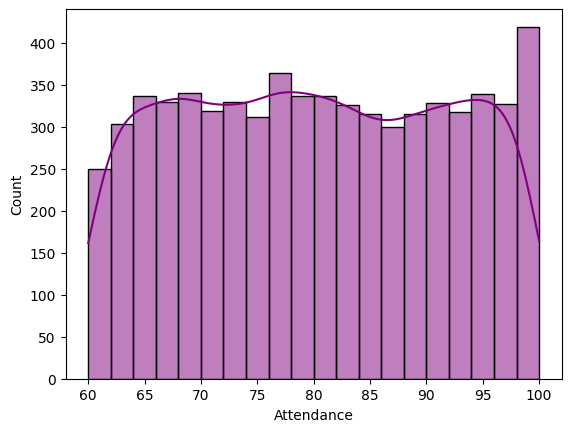

In [278]:
media=df["Attendance"].mean()
mediana=df["Attendance"].median()
moda=df["Attendance"].mode()
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda[0]}")
sns.histplot(data=df, x="Attendance", kde=True, bins=20, color="purple")
plt.show()

Completo los faltantes con la moda

In [279]:
df["Attendance"] = df["Attendance"].fillna(moda[0])

Campo "Teacher_Quality"

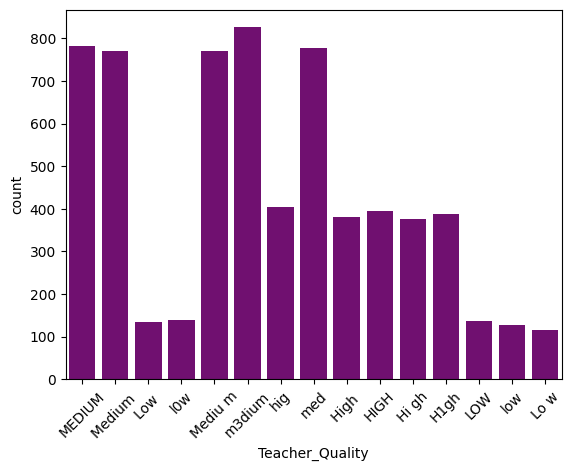

In [280]:
sns.countplot(data=df, x="Teacher_Quality", color="purple")
plt.xticks(rotation=45)
plt.show()


Vamos a dejar las categorias Low, Medium y High

In [281]:
df["Teacher_Quality"].str.lower().value_counts()

Teacher_Quality
m3dium     826
medium     782
med        777
medium     770
mediu m    770
hig        405
high       394
h1gh       389
high       382
hi gh      377
low        266
l0w        140
low        135
lo w       116
Name: count, dtype: int64

In [282]:
dict_categoria = { # Correccion categoria Low
                        "l0w":"Low",
                        "low":"Low",
                        # Correccion categoria Medium
                        "m3dium":"Medium",
                        "medium":"Medium",
                        "med":"Medium",
                        # Correccion categoria Low
                        "h1gh":"High",
                        "high":"High",
                        "hig":"High"}
df["Teacher_Quality"] = df["Teacher_Quality"].str.replace(" ", "").str.lower().replace(dict_categoria)

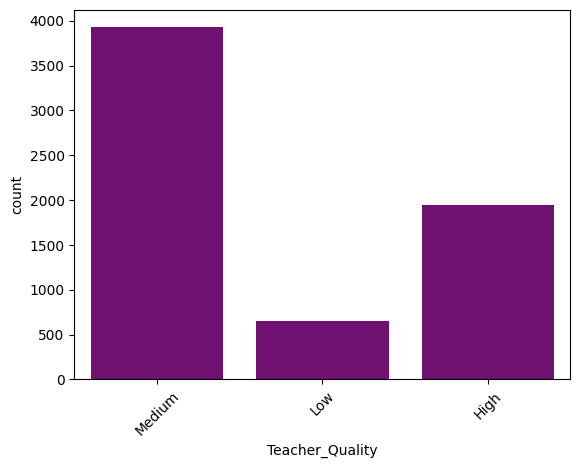

In [283]:
sns.countplot(data=df, x="Teacher_Quality", color="purple")
plt.xticks(rotation=45)
plt.show()

Completo los datos faltantes con la categoria "Medium"

In [284]:
df["Teacher_Quality"] = df["Teacher_Quality"].fillna("Medium")

Campo "Parental_Education_Level"

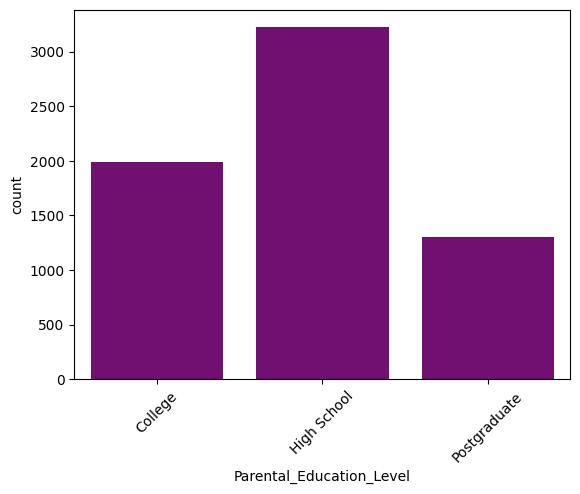

In [285]:
sns.countplot(data=df, x="Parental_Education_Level", color="purple")
plt.xticks(rotation=45)
plt.show()

Completo los datos faltantes con la categoria "High School"

In [286]:
df["Parental_Education_Level"] = df["Parental_Education_Level"].fillna("High School")

Campo "Distance_from_Home"

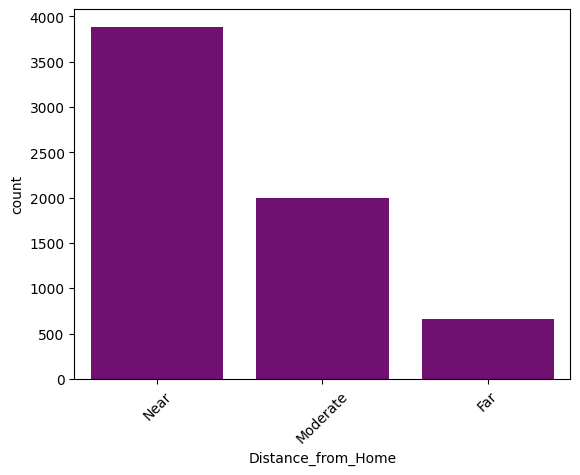

In [287]:
sns.countplot(data=df, x="Distance_from_Home", color="purple")
plt.xticks(rotation=45)
plt.show()

Completo los datos faltantes con la categoria "Near"

In [288]:
df["Distance_from_Home"] = df["Distance_from_Home"].fillna("Near")

In [289]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.857273,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.567127,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# 🔍 Analisis exploratorio de datos

In [290]:
df["Exam_Score"].replace(101, 100, inplace=True)
df.describe()

C:\Users\lucas\AppData\Local\Temp\ipykernel_30276\417985543.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Exam_Score"].replace(101, 100, inplace=True)


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.857273,7.02906,75.070531,1.493719,2.967610,67.235508
std,5.990594,11.567127,1.46812,14.399784,1.230570,1.031231,3.889161
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,100.000000


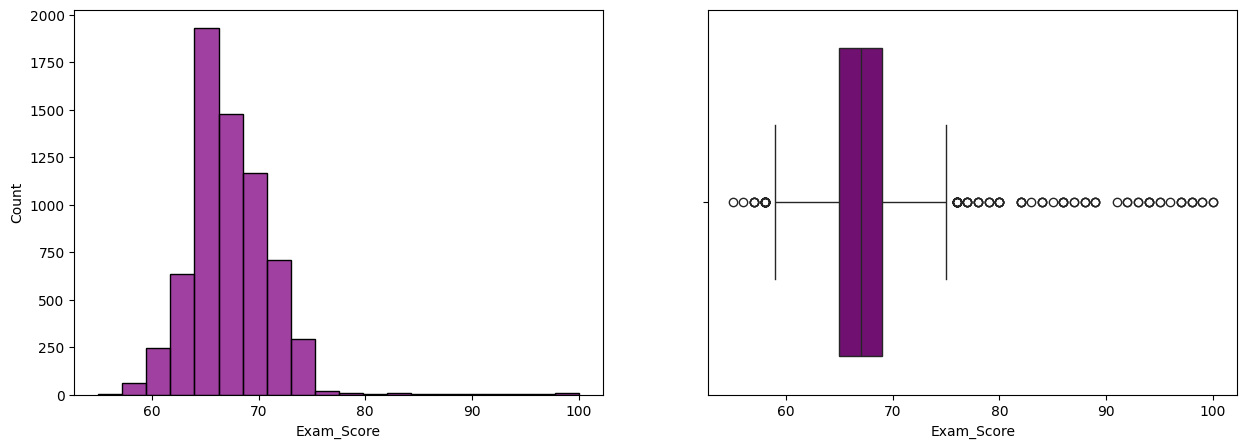

Estadisticas: 
Media: 67.23550779476312
Mediana: 67.0
Moda: 0    68
Name: Exam_Score, dtype: int64
Curtosis: 10.496235916782396
Asimetria: 1.6380225864319955


In [291]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(data=df, x="Exam_Score", bins=20, ax=axes[0], color="purple")
sns.boxplot(data=df, x="Exam_Score", ax=axes[1], color="purple")
plt.show()
media = df["Exam_Score"].mean()
mediana = df["Exam_Score"].median()
moda = df["Exam_Score"].mode()
curtosis = df["Exam_Score"].kurt()
asimetria = df["Exam_Score"].skew()
print("Estadisticas: ")
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print(f"Curtosis: {curtosis}")
print(f"Asimetria: {asimetria}")

📌 Tenemos una curtosis muy lepsocurtica y una asimetria positiva.

📌 Vemos que hay muchos estudiantes con notas bajas/medias y pocos con notas altas.
La mayoria de los estudiantes tuvieron una nota cerca de la media (67.23)

📌 Vemos que hay outliers, la mayoria son de notas altas



## 💡 Hipotesis

### **🤔 H1: Las horas de estudio predicen positivamente la nota del examen.**

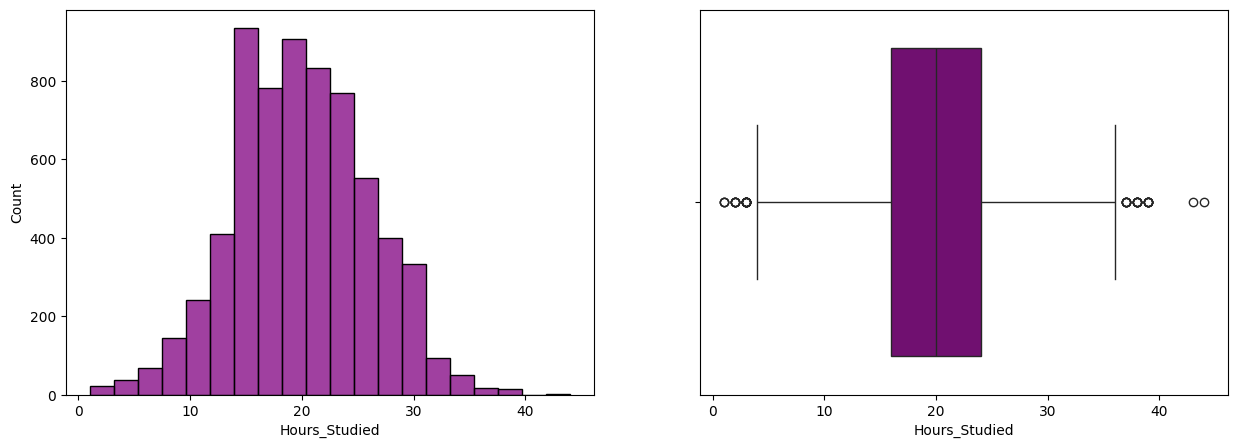

Estadisticas: 
Media: 19.975329196306948
Mediana: 20.0
Moda: 0    20
Name: Hours_Studied, dtype: int64
Curtosis: 0.017770627289391605
Asimetria: 0.013498908859762987


In [292]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(data=df, x="Hours_Studied", bins=20, ax=axes[0], color="purple")
sns.boxplot(data=df, x="Hours_Studied", ax=axes[1], color="purple")
plt.show()
media = df["Hours_Studied"].mean()
mediana = df["Hours_Studied"].median()
moda = df["Hours_Studied"].mode()
curtosis = df["Hours_Studied"].kurt()
asimetria = df["Hours_Studied"].skew()
print("Estadisticas: ")
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print(f"Curtosis: {curtosis}")
print(f"Asimetria: {asimetria}")

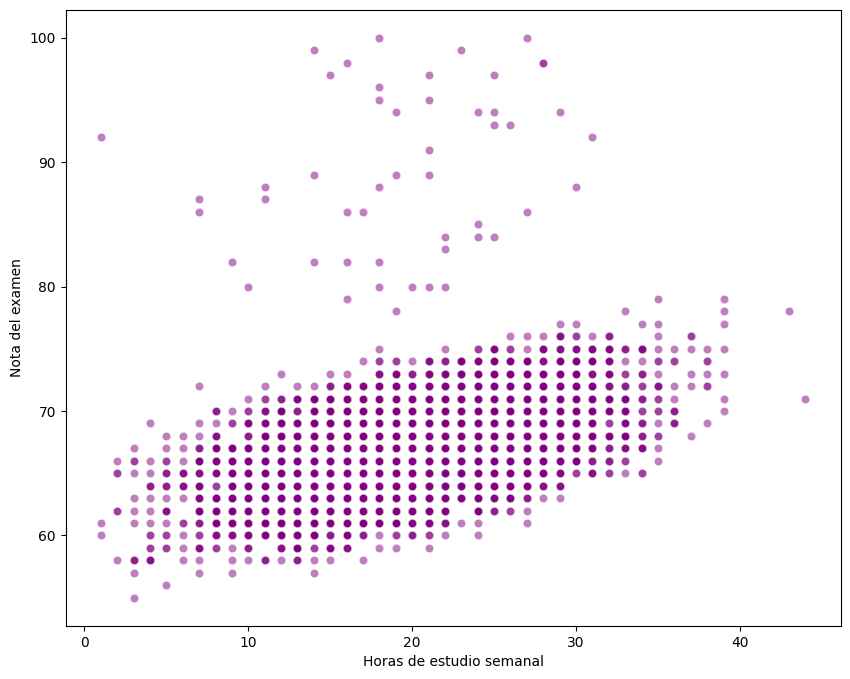

Correlacion: 0.44555758502321247


In [293]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="Hours_Studied", y="Exam_Score", color="purple", alpha=0.5)
plt.ylabel("Nota del examen")
plt.xlabel("Horas de estudio semanal")
plt.show()
correlacion = df['Hours_Studied'].corr(df['Exam_Score'])
print(f"Correlacion: {correlacion}")

📌 Existe una correlacion moderada positiva entre la nota del examen y las horas de estudio semanal. Por lo tanto, se puede decir que las horas de estudio afectan positivamente nota del examen.

🤔 ¿La relación es más fuerte en estudiantes con alta motivación?


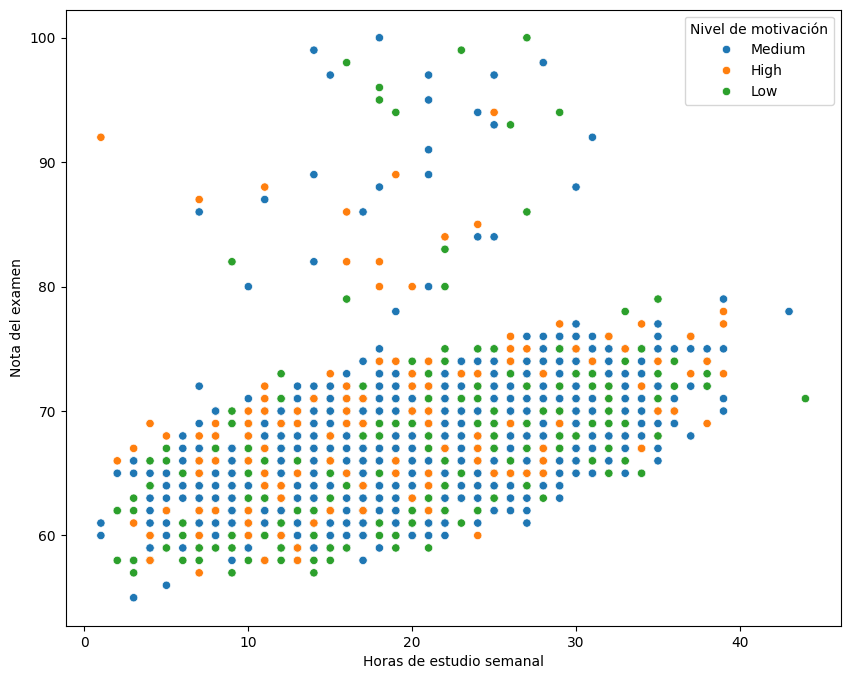

Motivation_Level               
High              Hours_Studied    0.422869
Low               Hours_Studied    0.472865
Medium            Hours_Studied    0.443860
Name: Exam_Score, dtype: float64


In [294]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="Hours_Studied", y="Exam_Score", hue="Motivation_Level" ,color="purple")
plt.ylabel("Nota del examen")
plt.xlabel("Horas de estudio semanal")
plt.legend(title="Nivel de motivación") 
plt.show()
print(df.groupby("Motivation_Level")[["Hours_Studied", "Exam_Score"]].corr().iloc[0::2, 1])

📌 No, la relacion no es mas fuerte para los alumnos con alta motivacion. Se observa que la relacion es mas fuerte para alumnos con baja motivacion.

### **🤔 H2. La asistencia tiene un efecto significativo sobre la nota, incluso viendolo por horas de estudio.**

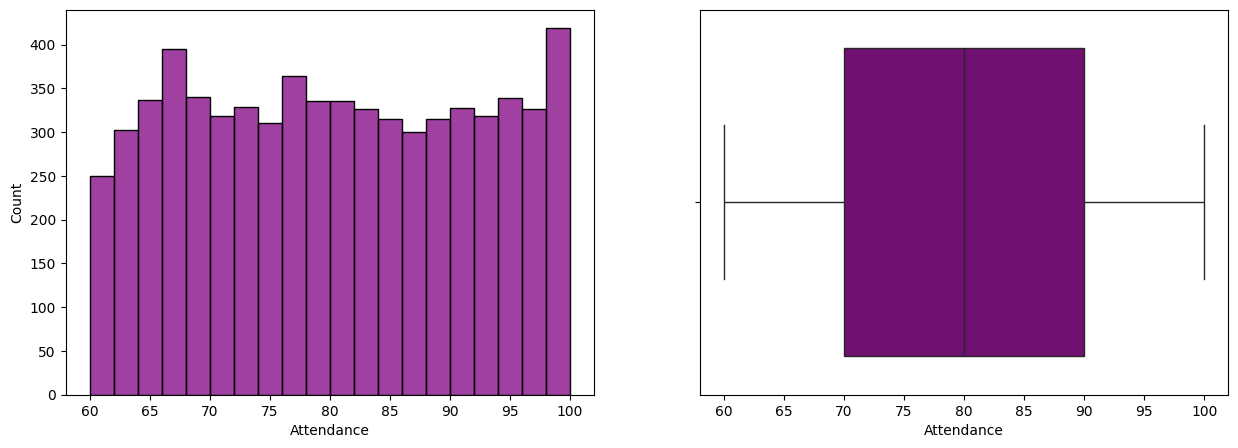

Estadisticas: 
Media: 79.85727258967762
Mediana: 80.0
Moda: 0    67.0
Name: Attendance, dtype: float64
Curtosis: -1.2055542596677387
Asimetria: 0.03149965063994678


In [295]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(data=df, x="Attendance", bins=20, ax=axes[0], color="purple")
sns.boxplot(data=df, x="Attendance", ax=axes[1], color="purple")
plt.show()
media = df["Attendance"].mean()
mediana = df["Attendance"].median()
moda = df["Attendance"].mode()
curtosis = df["Attendance"].kurt()
asimetria = df["Attendance"].skew()
print("Estadisticas: ")
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print(f"Curtosis: {curtosis}")
print(f"Asimetria: {asimetria}")

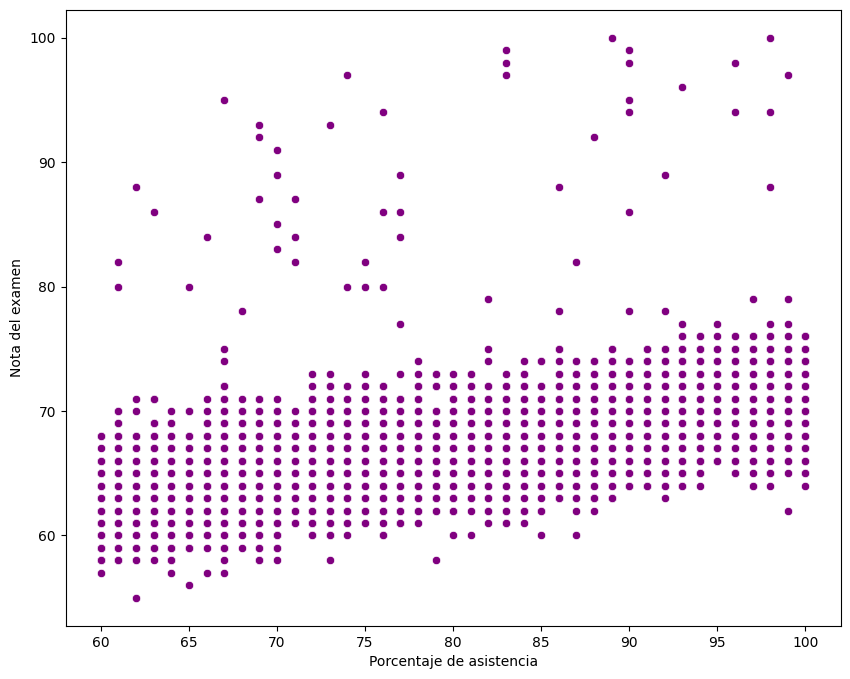

Correlacion: 0.5758829958728549


In [296]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="Attendance", y="Exam_Score",color="purple")
plt.ylabel("Nota del examen")
plt.xlabel("Porcentaje de asistencia")
plt.show()
correlacion = df['Attendance'].corr(df['Exam_Score'])
print(f"Correlacion: {correlacion}")

📌  Se observa que hay una correlacion moderada positiva entre el porcentaje de asistencia y la nota del examen.Por lo tanto, se puede decir que la asistencia a clases afectan positivamente la nota del examen.

In [297]:
def horas_estudio_categoria(horas):
    if horas < 10:
        return "Baja"
    elif horas < 20:
         return "Media"
    else:
         return "Alta"
df["Horas_Estudio_Cat"] = df["Hours_Studied"].apply(horas_estudio_categoria)

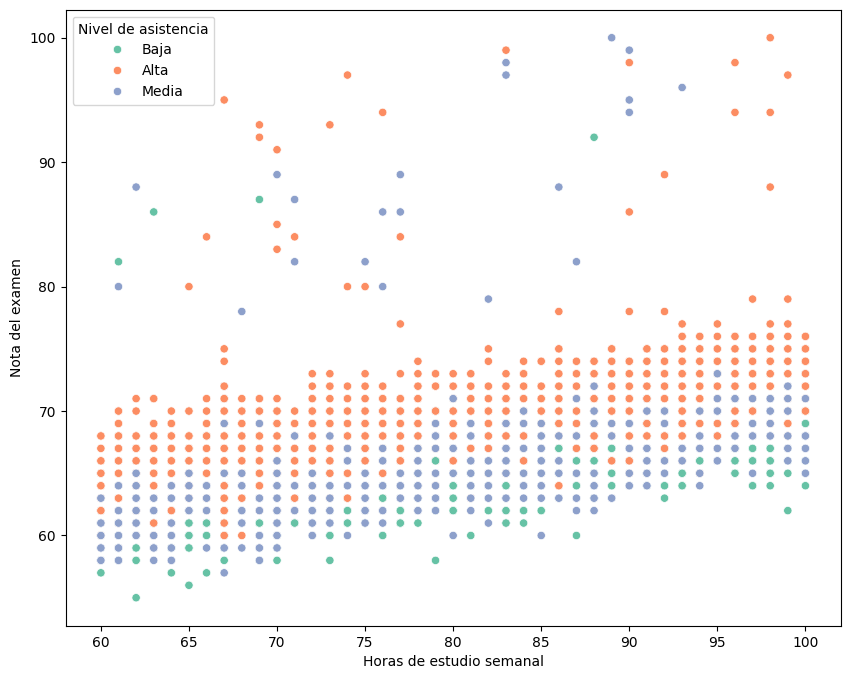

Horas_Estudio_Cat            
Alta               Attendance    0.623326
Baja               Attendance    0.496346
Media              Attendance    0.629775
Name: Exam_Score, dtype: float64


In [298]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="Attendance", y="Exam_Score", hue="Horas_Estudio_Cat", palette="Set2")
plt.ylabel("Nota del examen")
plt.xlabel("Horas de estudio semanal")
plt.legend(title="Nivel de asistencia") 
plt.show()
print(df.groupby("Horas_Estudio_Cat")[["Attendance", "Exam_Score"]].corr().iloc[0::2, 1])


📌 Se observa que a mayor asistencia y mayor horas de estudios semanales mayor sera la nota final.

In [299]:
df.drop("Horas_Estudio_Cat", axis=1, inplace=True)

### **🤔 H3. La calidad profesor se asocia positivamente con la nota del examen.**

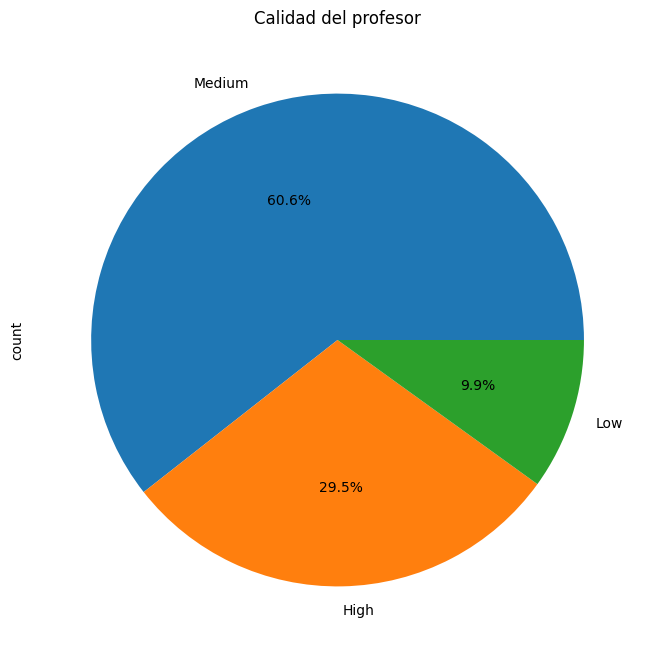

In [300]:
plt.figure(figsize=(10,8))
df["Teacher_Quality"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.xticks(rotation=45)
plt.title("Calidad del profesor")
plt.show()

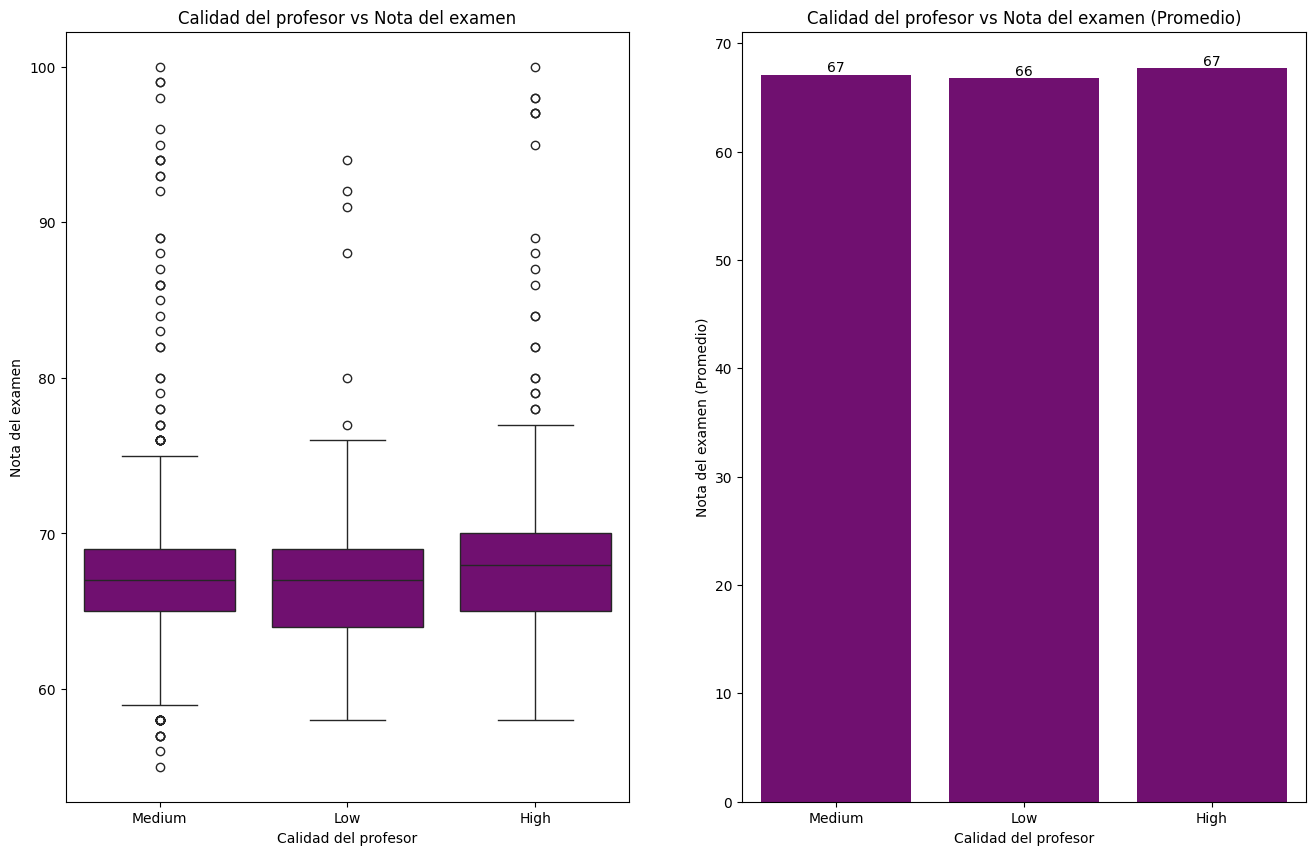

In [301]:

fig, axes = plt.subplots(1,2,figsize=(16,10))
sns.boxplot(data=df, x="Teacher_Quality", y="Exam_Score", color="purple", ax=axes[0])
sns.barplot(data=df, x="Teacher_Quality", y="Exam_Score",estimator="mean",errorbar=None, color="purple", ax=axes[1])
for bar in axes[1].patches:
    axes[1].annotate(text=int(bar.get_height()),xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),ha="center",va="bottom",fontsize=10,color="black")
axes[0].set_title("Calidad del profesor vs Nota del examen")
axes[0].set_xlabel("Calidad del profesor")
axes[0].set_ylabel("Nota del examen")
axes[1].set_title("Calidad del profesor vs Nota del examen (Promedio)")
axes[1].set_xlabel("Calidad del profesor")
axes[1].set_ylabel("Nota del examen (Promedio)")
plt.show()


In [302]:
df.loc[df["Teacher_Quality"] == "Low", "Exam_Score"].describe()

count    657.000000
mean      66.753425
std        3.872207
min       58.000000
25%       64.000000
50%       67.000000
75%       69.000000
max       94.000000
Name: Exam_Score, dtype: float64

In [303]:
df.loc[df["Teacher_Quality"] == "Medium", "Exam_Score"].describe()

count    4003.000000
mean       67.100175
std         3.831627
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       100.000000
Name: Exam_Score, dtype: float64

In [304]:
df.loc[df["Teacher_Quality"] == "High", "Exam_Score"].describe()

count    1947.000000
mean       67.676425
std         3.973457
min        58.000000
25%        65.000000
50%        68.000000
75%        70.000000
max       100.000000
Name: Exam_Score, dtype: float64

📌 Se observa una leve relacion alta entre la calidad del profesor y la nota del examen. Por lo tanto, la calidad del profesor no necesariamente se asocia positivamente con la nota del examen

### **🤔 H4. La presencia de dificultades de aprendizaje se asocia con puntajes más bajos.**

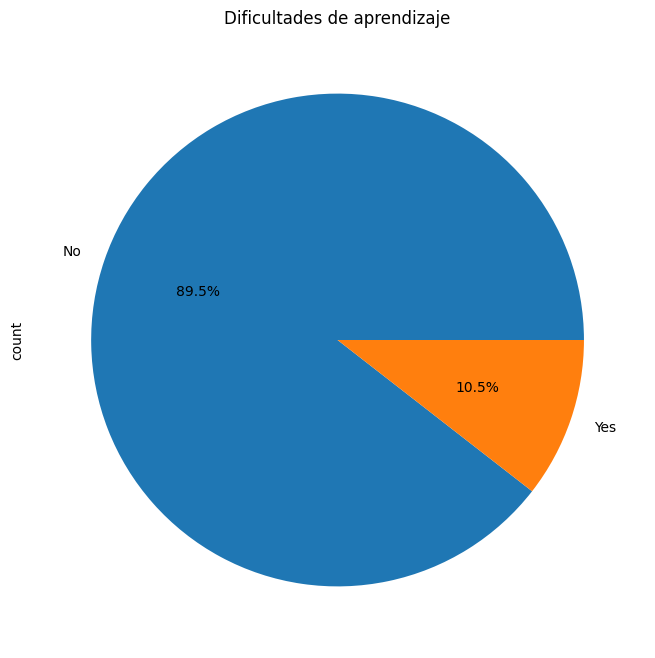

In [305]:
plt.figure(figsize=(10,8))
df["Learning_Disabilities"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.xticks(rotation=45)
plt.title("Dificultades de aprendizaje")
plt.show()

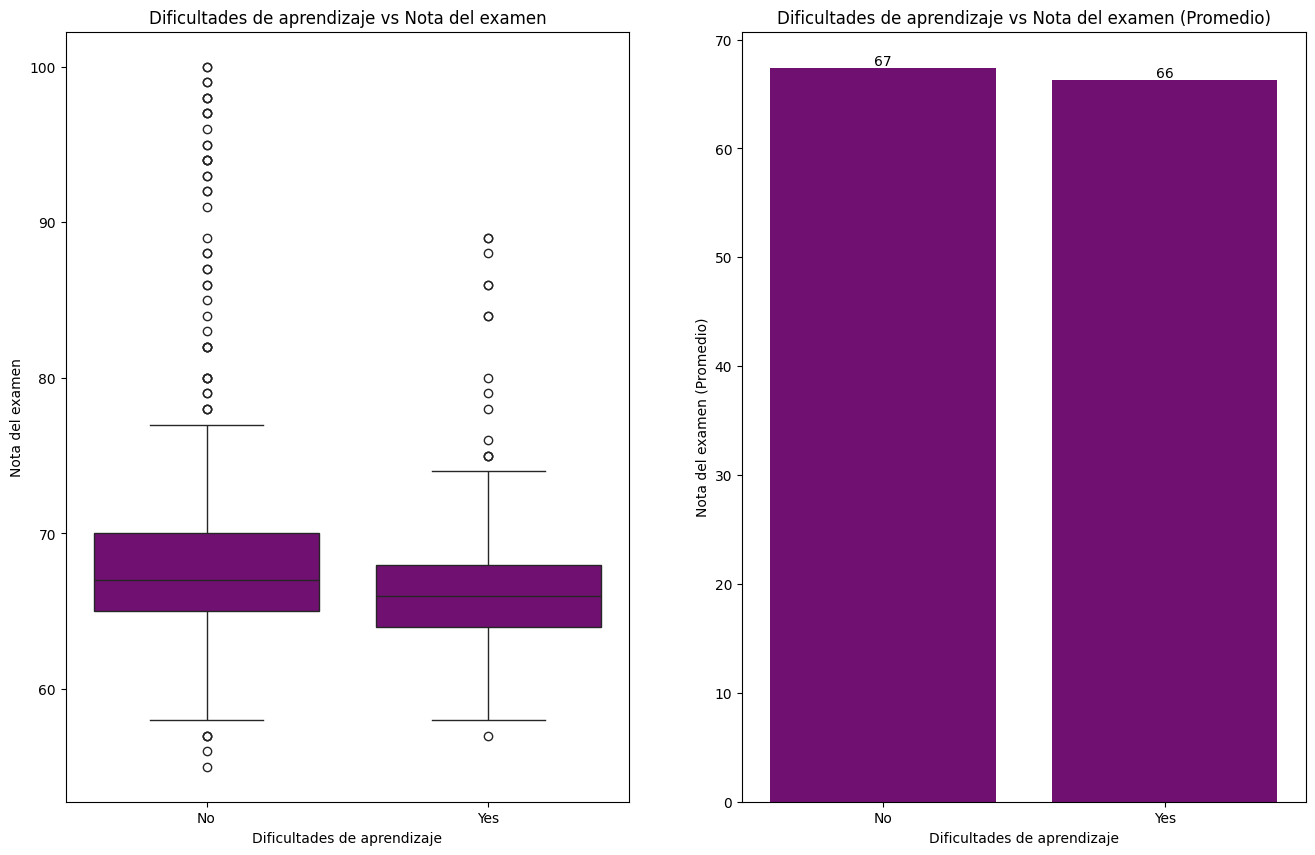

In [306]:

fig, axes = plt.subplots(1,2,figsize=(16,10))
sns.boxplot(data=df, x="Learning_Disabilities", y="Exam_Score", color="purple", ax=axes[0])
sns.barplot(data=df, x="Learning_Disabilities", y="Exam_Score",estimator="mean",errorbar=None, color="purple", ax=axes[1])
for bar in axes[1].patches:
    axes[1].annotate(text=int(bar.get_height()),xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),ha="center",va="bottom",fontsize=10,color="black")
axes[0].set_title("Dificultades de aprendizaje vs Nota del examen")
axes[0].set_xlabel("Dificultades de aprendizaje")
axes[0].set_ylabel("Nota del examen")
axes[1].set_title("Dificultades de aprendizaje vs Nota del examen (Promedio)")
axes[1].set_xlabel("Dificultades de aprendizaje")
axes[1].set_ylabel("Nota del examen (Promedio)")
plt.show()


In [307]:
df.loc[df["Learning_Disabilities"] == "Yes", "Exam_Score"].describe()


count    695.000000
mean      66.270504
std        4.068071
min       57.000000
25%       64.000000
50%       66.000000
75%       68.000000
max       89.000000
Name: Exam_Score, dtype: float64

In [308]:
df.loc[df["Learning_Disabilities"] == "No", "Exam_Score"].describe()

count    5912.000000
mean       67.348951
std         3.852094
min        55.000000
25%        65.000000
50%        67.000000
75%        70.000000
max       100.000000
Name: Exam_Score, dtype: float64

📌 Tener dificultades de aprendizaje podria afectar leve y negativamente la nota del examen

### **🤔 H5. La distancia desde el hogar afecta negativamente el rendimiento**

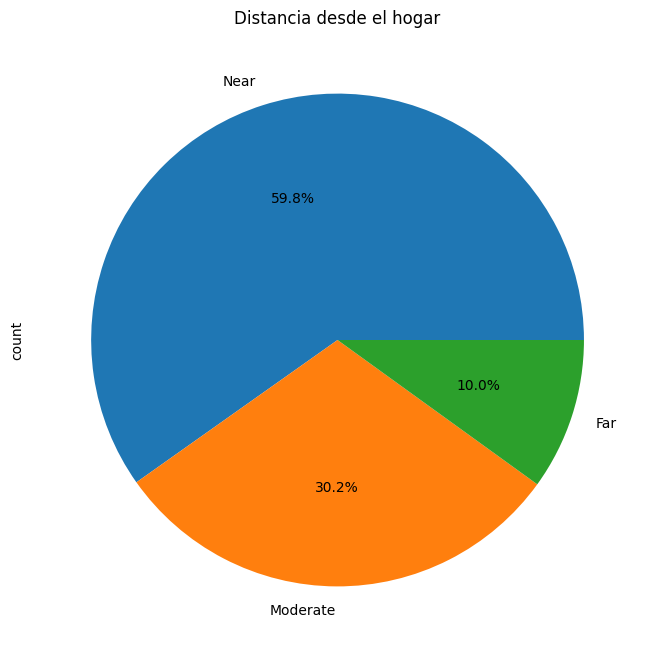

In [309]:
plt.figure(figsize=(10,8))
df["Distance_from_Home"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.xticks(rotation=45)
plt.title("Distancia desde el hogar")
plt.show()

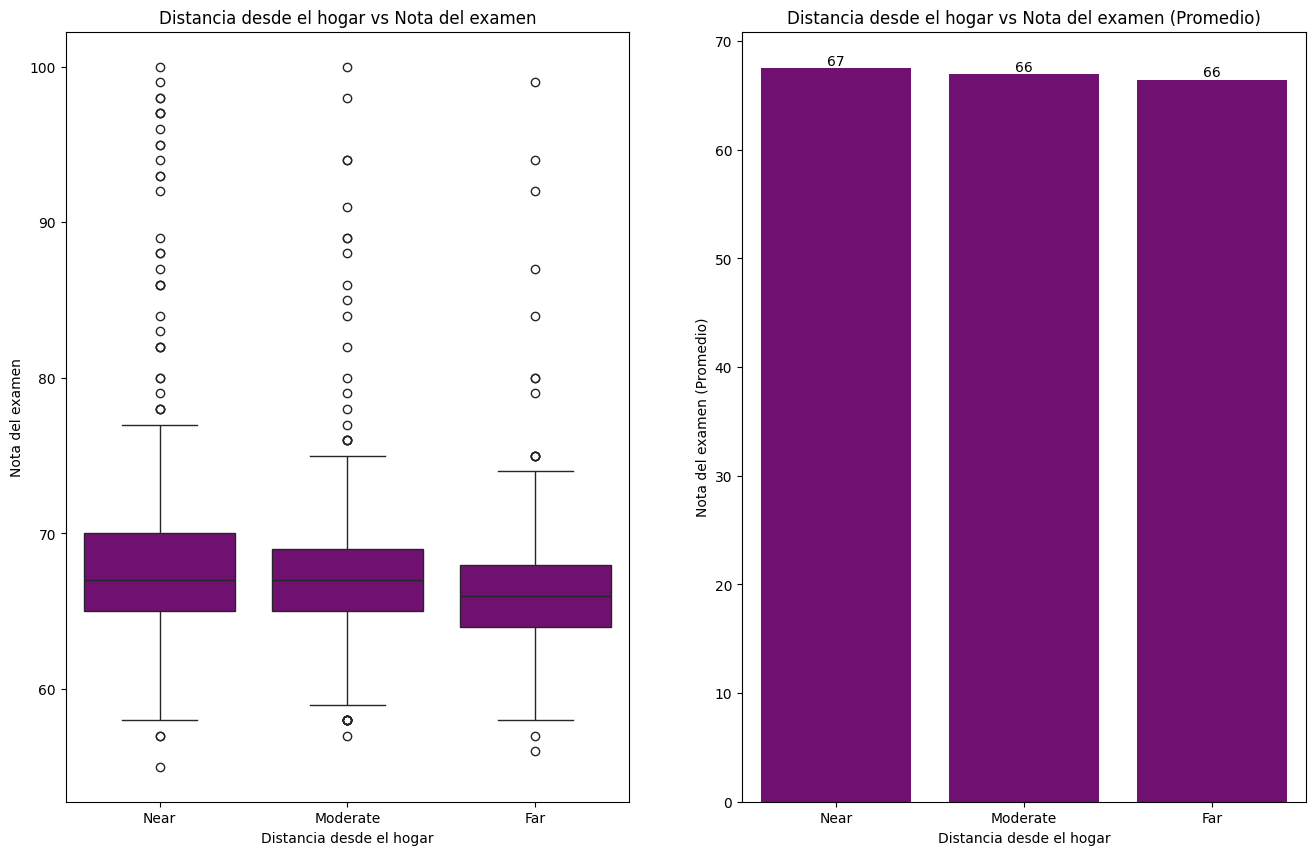

In [310]:

fig, axes = plt.subplots(1,2,figsize=(16,10))
sns.boxplot(data=df, x="Distance_from_Home", y="Exam_Score", color="purple", ax=axes[0])
sns.barplot(data=df, x="Distance_from_Home", y="Exam_Score",estimator="mean",errorbar=None, color="purple", ax=axes[1])
for bar in axes[1].patches:
    axes[1].annotate(text=int(bar.get_height()),xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),ha="center",va="bottom",fontsize=10,color="black")
axes[0].set_title("Distancia desde el hogar vs Nota del examen")
axes[0].set_xlabel("Distancia desde el hogar")
axes[0].set_ylabel("Nota del examen")
axes[1].set_title("Distancia desde el hogar vs Nota del examen (Promedio)")
axes[1].set_xlabel("Distancia desde el hogar")
axes[1].set_ylabel("Nota del examen (Promedio)")
plt.show()


In [311]:
df.loc[df["Distance_from_Home"] == "Near", "Exam_Score"].describe()

count    3951.000000
mean       67.493799
std         3.873428
min        55.000000
25%        65.000000
50%        67.000000
75%        70.000000
max       100.000000
Name: Exam_Score, dtype: float64

In [312]:
df.loc[df["Distance_from_Home"] == "Moderate", "Exam_Score"].describe()

count    1998.000000
mean       66.980981
std         3.782870
min        57.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       100.000000
Name: Exam_Score, dtype: float64

In [313]:
df.loc[df["Distance_from_Home"] == "Far", "Exam_Score"].describe()

count    658.000000
mean      66.457447
std        4.144885
min       56.000000
25%       64.000000
50%       66.000000
75%       68.000000
max       99.000000
Name: Exam_Score, dtype: float64

📌 Tener una alta distancia entre el hogar y la instuticion educativa podria afectar leve y negativamente a la nota del examen

### **🤔 H6. Los alumnos de escuelas privadas obtienen notas mas altas que los de escuelas públicas.**

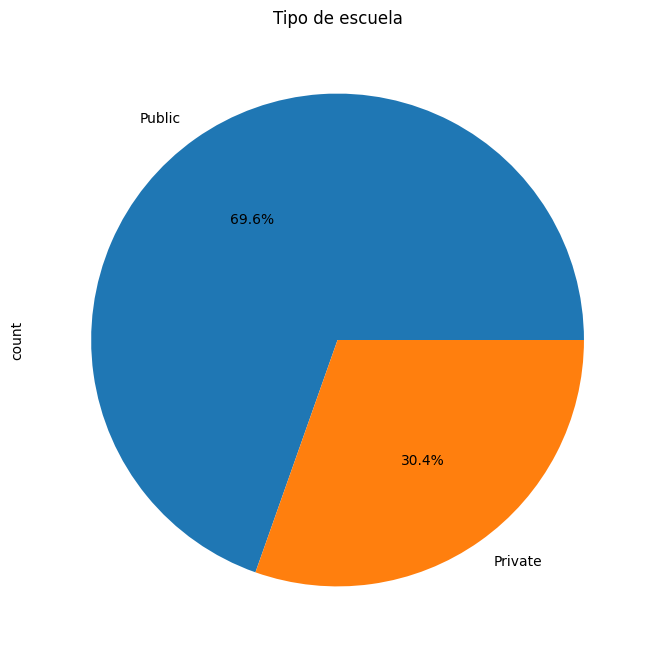

In [314]:
plt.figure(figsize=(10,8))
df["School_Type"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.xticks(rotation=45)
plt.title("Tipo de escuela")
plt.show()


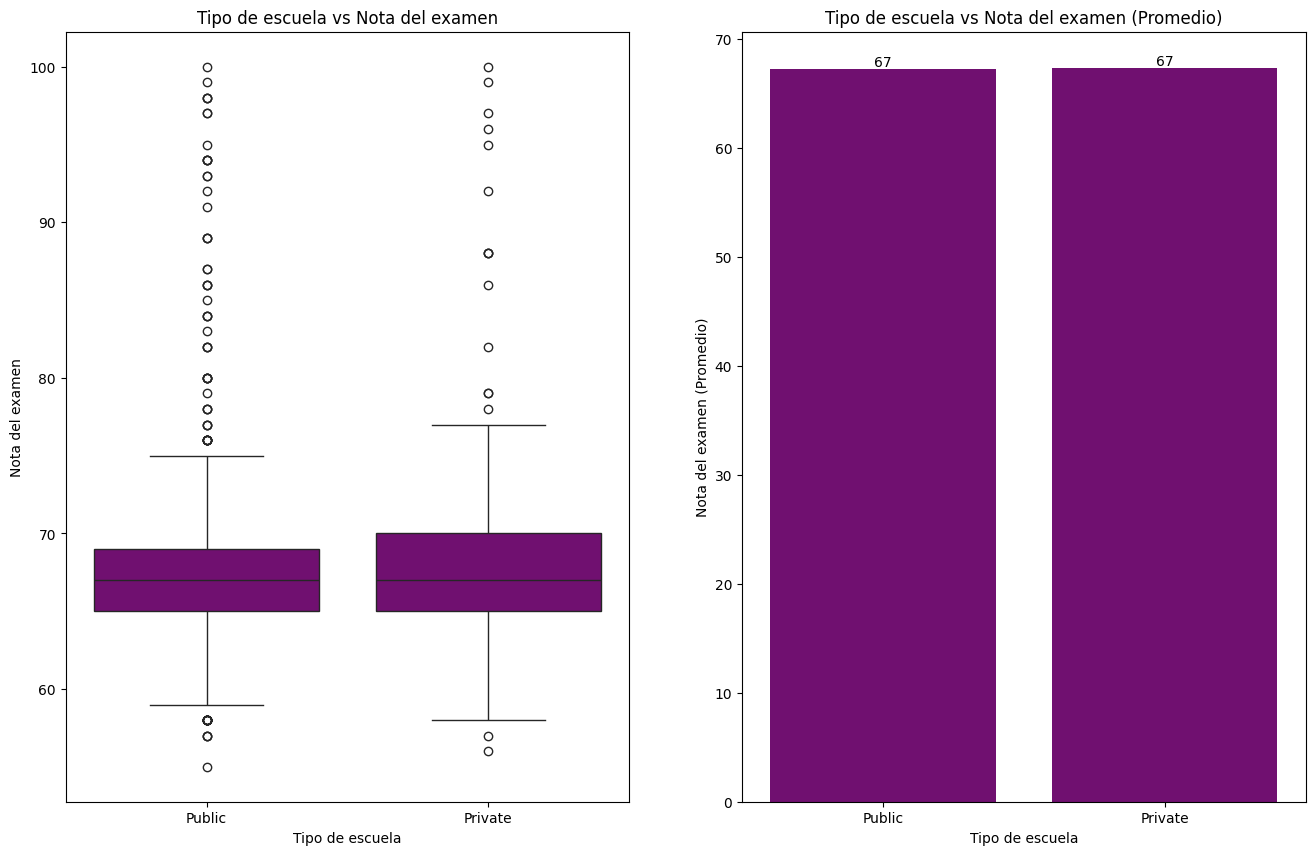

In [315]:

fig, axes = plt.subplots(1,2,figsize=(16,10))
sns.boxplot(data=df, x="School_Type", y="Exam_Score", color="purple", ax=axes[0])
sns.barplot(data=df, x="School_Type", y="Exam_Score",estimator="mean",errorbar=None, color="purple", ax=axes[1])
for bar in axes[1].patches:
    axes[1].annotate(text=int(bar.get_height()),xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),ha="center",va="bottom",fontsize=10,color="black")
axes[0].set_title("Tipo de escuela vs Nota del examen")
axes[0].set_xlabel("Tipo de escuela")
axes[0].set_ylabel("Nota del examen")
axes[1].set_title("Tipo de escuela vs Nota del examen (Promedio)")
axes[1].set_xlabel("Tipo de escuela")
axes[1].set_ylabel("Nota del examen (Promedio)")
plt.show()


In [316]:
df.loc[df["School_Type"] == "Public", "Exam_Score"].describe()

count    4598.000000
mean       67.212701
std         3.906844
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       100.000000
Name: Exam_Score, dtype: float64

In [317]:
df.loc[df["School_Type"] == "Private", "Exam_Score"].describe()

count    2009.000000
mean       67.287705
std         3.848844
min        56.000000
25%        65.000000
50%        67.000000
75%        70.000000
max       100.000000
Name: Exam_Score, dtype: float64

📌 Los estudiantes de escuelas privadas no obtienen notas significativamente mas altas que los de escuelas públicas.

### **🤔 H7. Los estudiantes con acceso a recursos (Internet, tutorías, materiales) obtienen mejores notas.**

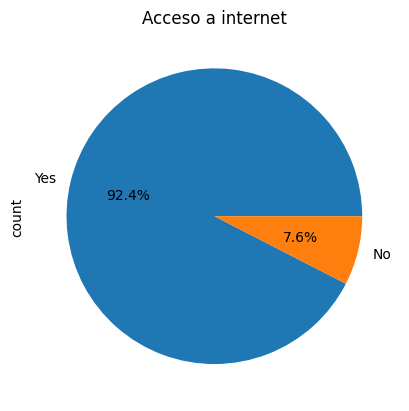

In [318]:
df["Internet_Access"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Acceso a internet")
plt.show()


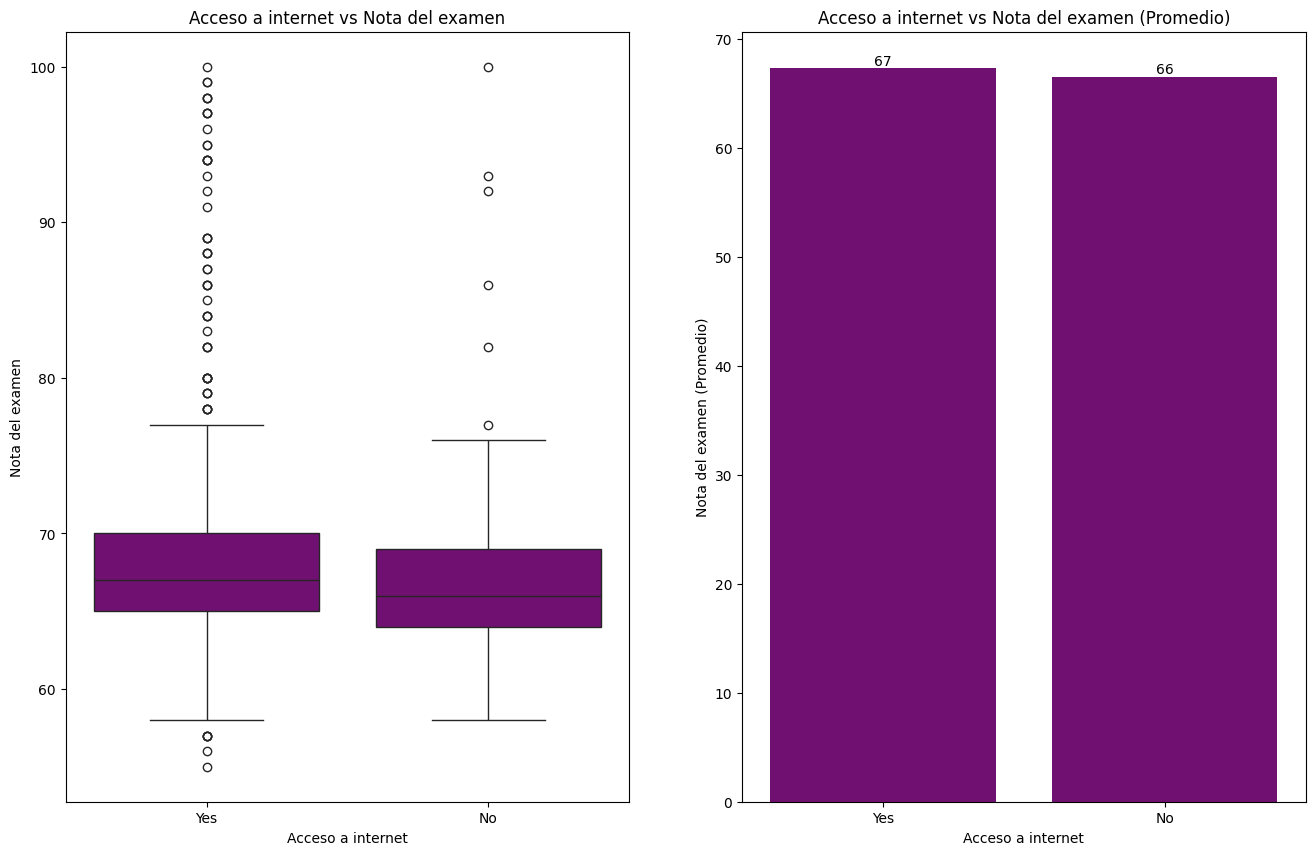

In [319]:
fig, axes = plt.subplots(1,2,figsize=(16,10))
sns.boxplot(data=df, x="Internet_Access", y="Exam_Score", color="purple", ax=axes[0])
sns.barplot(data=df, x="Internet_Access", y="Exam_Score",estimator="mean",errorbar=None, color="purple", ax=axes[1])
for bar in axes[1].patches:
    axes[1].annotate(text=int(bar.get_height()),xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),ha="center",va="bottom",fontsize=10,color="black")
axes[0].set_title("Acceso a internet vs Nota del examen")
axes[0].set_xlabel("Acceso a internet")

axes[0].set_ylabel("Nota del examen")
axes[1].set_title("Acceso a internet vs Nota del examen (Promedio)")
axes[1].set_xlabel("Acceso a internet")
axes[1].set_ylabel("Nota del examen (Promedio)")
plt.show()

Hay una leve mejora de las notas de los alumnos que tienen internet

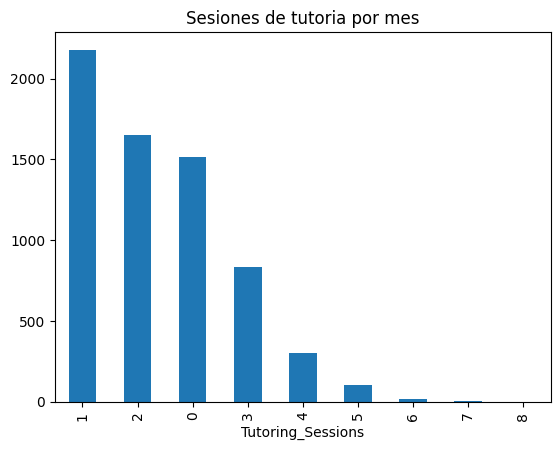

In [320]:
df["Tutoring_Sessions"].value_counts().plot(kind="bar")
plt.title("Sesiones de tutoria por mes")
plt.show()


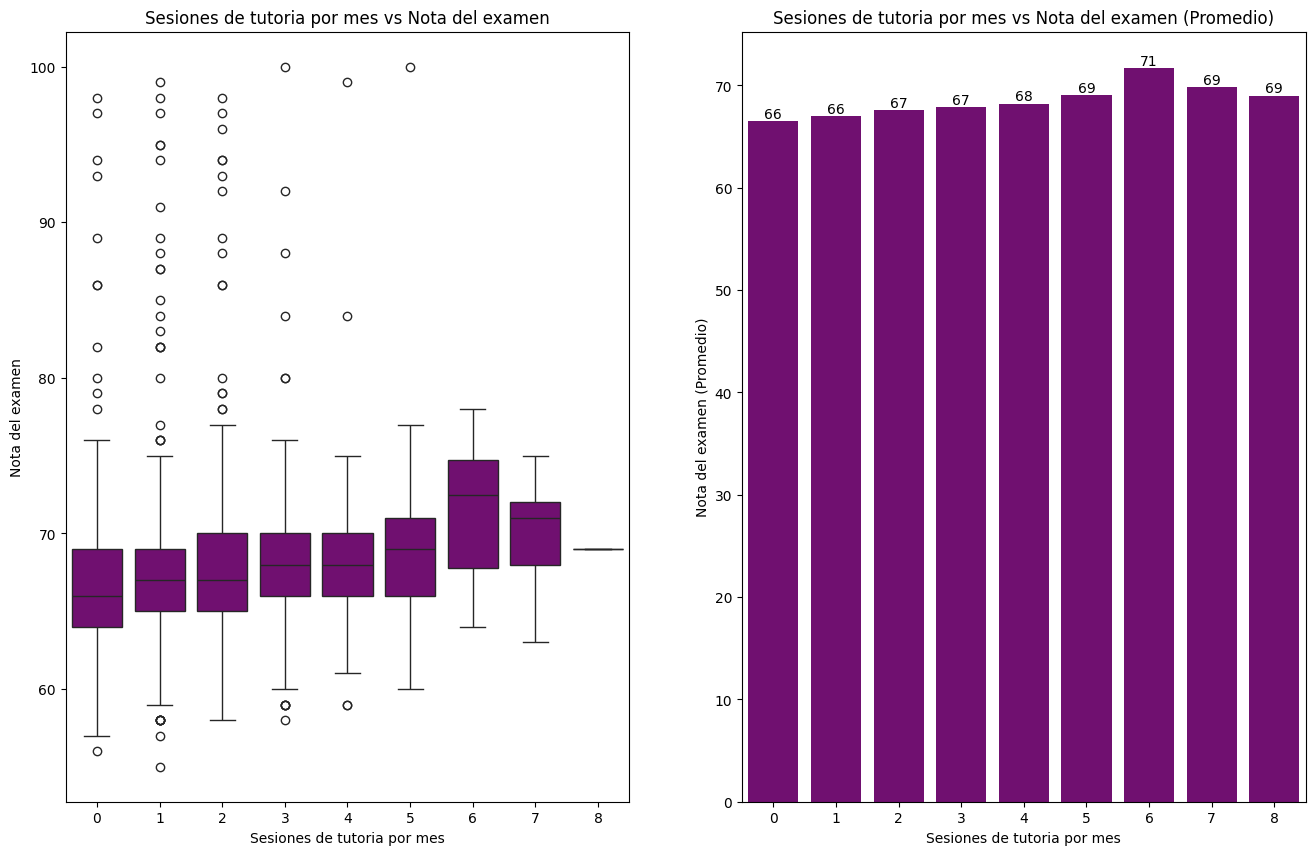

In [321]:
fig, axes = plt.subplots(1,2,figsize=(16,10))
sns.boxplot(data=df, x="Tutoring_Sessions", y="Exam_Score", color="purple", ax=axes[0])
sns.barplot(data=df, x="Tutoring_Sessions", y="Exam_Score",estimator="mean",errorbar=None, color="purple", ax=axes[1])
for bar in axes[1].patches:
    axes[1].annotate(text=int(bar.get_height()),xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),ha="center",va="bottom",fontsize=10,color="black")
axes[0].set_title("Sesiones de tutoria por mes vs Nota del examen")
axes[0].set_xlabel("Sesiones de tutoria por mes")

axes[0].set_ylabel("Nota del examen")
axes[1].set_title("Sesiones de tutoria por mes vs Nota del examen (Promedio)")
axes[1].set_xlabel("Sesiones de tutoria por mes")
axes[1].set_ylabel("Nota del examen (Promedio)")
plt.show()

Que el alumno concurra a sesiones de tutoria mejora su nota.

Se recomienda tener hasta un maximo de 6 sesiones por mes

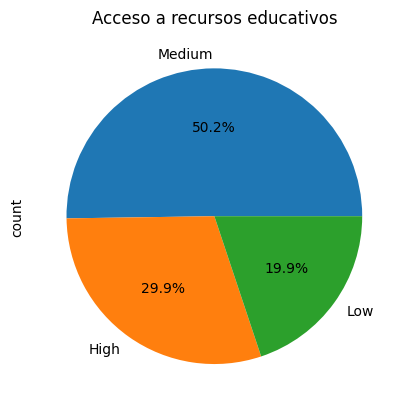

In [322]:
df["Access_to_Resources"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Acceso a recursos educativos")
plt.show()


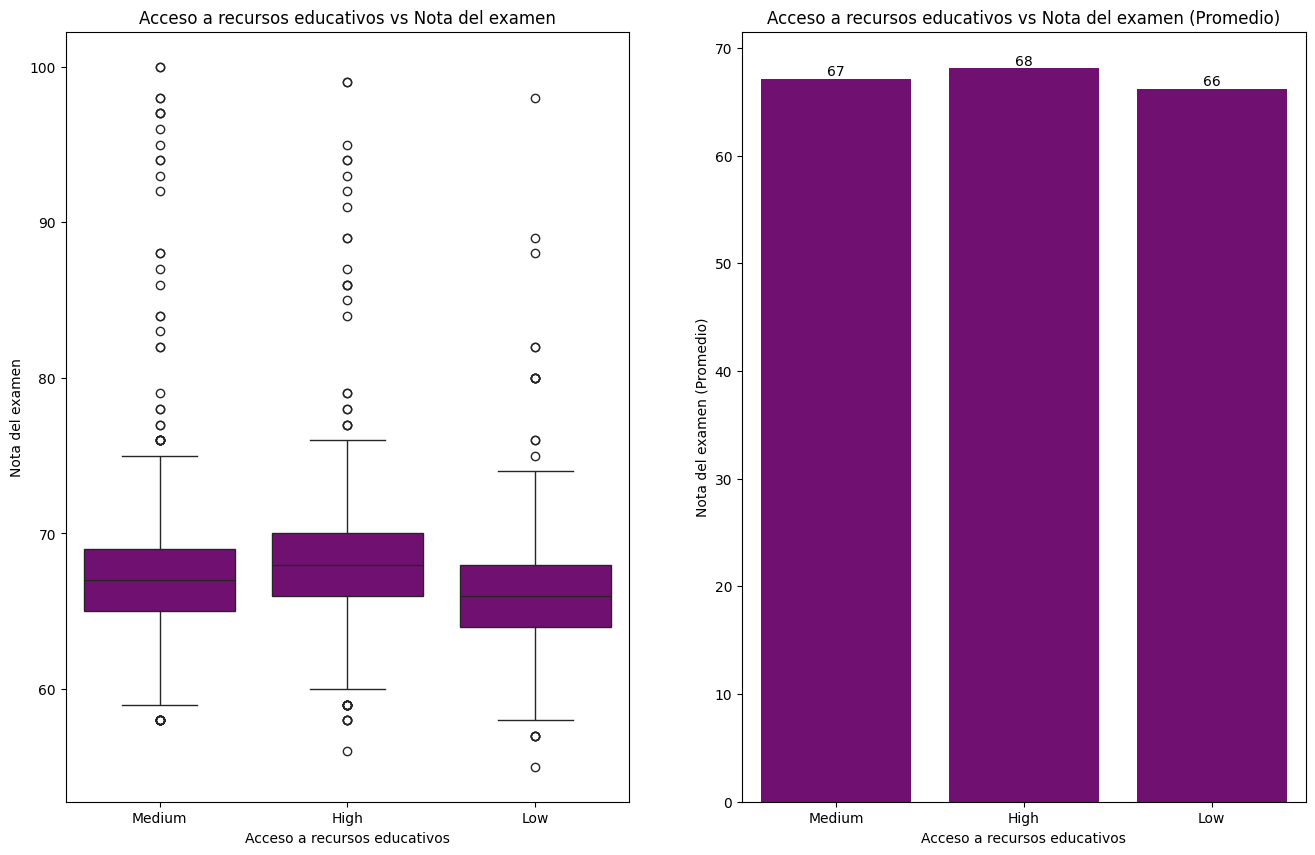

In [323]:
fig, axes = plt.subplots(1,2,figsize=(16,10))
sns.boxplot(data=df, x="Access_to_Resources", y="Exam_Score", color="purple", ax=axes[0])
sns.barplot(data=df, x="Access_to_Resources", y="Exam_Score",estimator="mean",errorbar=None, color="purple", ax=axes[1])
for bar in axes[1].patches:
    axes[1].annotate(text=int(bar.get_height()),xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),ha="center",va="bottom",fontsize=10,color="black")
axes[0].set_title("Acceso a recursos educativos vs Nota del examen")
axes[0].set_xlabel("Acceso a recursos educativos")

axes[0].set_ylabel("Nota del examen")
axes[1].set_title("Acceso a recursos educativos vs Nota del examen (Promedio)")
axes[1].set_xlabel("Acceso a recursos educativos")
axes[1].set_ylabel("Nota del examen (Promedio)")
plt.show()

Hay una leve mejora de las notas de los alumnos que tienen mas acceso a los recursos educativos

📌 Por lo tanto, los alumnos con acceso a recursos tienen mejores notas. Aunque significativamente hablando las tutorias son las que mayor resultados da.